In [1]:
import time
from itertools import chain
from typing import Any, Callable, Dict, List, Set, Tuple, Union
import math
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate

In [2]:
UNITED_STATES_MAP = mpimg.imread("images/cj_sry.png")

In [3]:
class City:
    """Represents a city with its name and coordinates."""

    def __init__(self, name: str, coordinates: Tuple[int, int]):
        if not isinstance(name, str):
            raise TypeError("City name must be a string.")
        if (
            not isinstance(coordinates, tuple)
            or len(coordinates) != 2
            or not all(isinstance(coord, (int, float)) for coord in coordinates)
        ):
            raise TypeError("Coordinates must be a tuple of two numbers.")
        self.name = name
        self.coordinates = coordinates

    def __repr__(self) -> str:
        return f"City(name='{self.name}', coordinates={self.coordinates})"

    def __eq__(self, other: object) -> bool:
        if not isinstance(other, City):
            return False
        return self.name == other.name and self.coordinates == other.coordinates

    def __hash__(self) -> int:
        return hash((self.name, self.coordinates))


class Path:
    """Represents a path as a list of City objects."""

    def __init__(self, cities: List[City]):
        if not isinstance(cities, list):
            raise TypeError("Cities must be a list.")
        if not all(isinstance(city, City) for city in cities):
            raise TypeError("All elements in cities list must be City objects.")

        self.cities = cities
        self._distances = self._calculate_distances()

    def __repr__(self) -> str:
        return f"Path(cities={[city.name for city in self.cities]})"

    def get_coordinates(self) -> List[Tuple[int, int]]:
        """Returns a list of (x, y) coordinates from the cities in the path."""
        return [city.coordinates for city in self.cities]

    def is_valid(self) -> bool:
        """Checks if the path contains all unique cities."""
        return len(self.cities) == len(set(self.cities))

    def to_dict(self) -> Dict[str, Tuple[int, int]]:
        """Converts the Path to a dictionary of city names and coordinates."""
        return {city.name: city.coordinates for city in self.cities}

    def get_names(self) -> List[str]:
        """Return a list of city names in the path."""
        return [city.name for city in self.cities]

    def to_list_of_tuples(self) -> List[Tuple[str, Tuple[int, int]]]:
        """Returns the path as a list of tuples of (name, coordinates)."""
        return [(city.name, city.coordinates) for city in self.cities]

    def _calculate_distances(self) -> List[float]:
        """Calculates the distances between consecutive cities in the path."""
        distances = []
        for i in range(len(self.cities) - 1):
            distances.append(distance(self.cities[i], self.cities[i + 1]))
        distances.append(distance(self.cities[-1], self.cities[0]))
        return distances

    def get_route_table(self) -> str:
        """Generates a table summarizing the city route with distances."""
        headers = ["Number", "City Name", "Distance (from previous city)"]
        table_data = []
        for i, city in enumerate(self.cities):
            distance_val = self._distances[i]
            table_data.append([i + 1, city.name, f"{distance_val:.2f}"])
        return tabulate(table_data, headers=headers, tablefmt="grid")

In [4]:
def show_cities(
    path: Union[Path, List[City], Dict[str, Tuple[int, int]]], w: int = 12, h: int = 8
) -> None:
    """Plots cities on the US map."""

    if isinstance(path, Path):
        path_coords = path.get_coordinates()
    elif isinstance(path, list) and all(isinstance(city, City) for city in path):
        path_coords = [city.coordinates for city in path]
    elif isinstance(path, dict):
        path_coords = list(path.values())
    elif isinstance(path, list) and isinstance(path[0], tuple):
        path_coords = [item[1] for item in path]
    else:
        raise ValueError("Invalid path format.")

    plt.imshow(UNITED_STATES_MAP)
    for x0, y0 in path_coords:
        plt.plot(x0, y0, "y*", markersize=15)
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])
    plt.show()


def show_path(
    path: Union[Path, List[City], Dict[str, Tuple[int, int]]],
    starting_city: Union[City, Tuple[int, int]] = None,
    w: int = 12,
    h: int = 8,
) -> None:
    """Plots a path on the US map."""
    if isinstance(path, Path):
        path_coords = path.get_coordinates()
    elif isinstance(path, list) and all(isinstance(city, City) for city in path):
        path_coords = [city.coordinates for city in path]
    elif isinstance(path, dict):
        path_coords = list(path.values())
    elif isinstance(path, list) and isinstance(path[0], tuple):
        path_coords = [item[1] for item in path]
    else:
        raise ValueError("Invalid path format.")

    if isinstance(starting_city, City):
        starting_coords = starting_city.coordinates
    elif isinstance(starting_city, tuple):
        starting_coords = starting_city
    elif starting_city is None:
        starting_coords = path_coords[0]
    else:
        raise ValueError("Invalid starting_city format.")

    x, y = zip(*path_coords)
    plt.imshow(UNITED_STATES_MAP)
    plt.plot(x + x[:1], y + y[:1])
    plt.plot(
        starting_coords[0], starting_coords[1], "y*", markersize=15
    )  # start from origin with star
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])
    plt.show()


def polyfit_plot(x: List[float], y: List[float], deg: int, **kwargs: Any) -> None:
    """Plots a polynomial fit of the given x and y data."""
    coefficients = np.polyfit(x, y, deg, **kwargs)
    poly = np.poly1d(coefficients)
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    plt.plot(x, y, "o", new_x, new_y)
    plt.xlim([x[0] - 1, x[-1] + 1])

    terms = []
    for p, c in enumerate(reversed(coefficients)):
        term = str(round(c, 1))
        if p == 1:
            term += "x"
        if p >= 2:
            term += "x^" + str(p)
        terms.append(term)
    plt.title(" + ".join(reversed(terms)))
    plt.show()


def distance(
    city1: Union[City, Tuple[str, Tuple[int, int]]],
    city2: Union[City, Tuple[str, Tuple[int, int]]],
) -> float:
    """Calculates the Euclidean distance between two cities."""
    if isinstance(city1, City) and isinstance(city2, City):
        xy1 = city1.coordinates
        xy2 = city2.coordinates
    elif isinstance(city1, tuple) and isinstance(city2, tuple):
        xy1 = city1[1]
        xy2 = city2[1]
    else:
        raise ValueError("Invalid city format.")
    return math.sqrt((xy1[0] - xy2[0]) ** 2 + (xy1[1] - xy2[1]) ** 2)


def path_distance(path: Union[Path, List[City], Dict[str, Tuple[int, int]]]) -> int:
    """Calculates the total distance of a path."""
    if isinstance(path, Path):
        cities = path.cities
    elif isinstance(path, list) and all(isinstance(city, City) for city in path):
        cities = path
    elif isinstance(path, dict):
        cities = [City(name, coords) for name, coords in path.items()]
    elif isinstance(path, list) and isinstance(path[0], tuple):
        cities = [City(name, coords) for name, coords in path]
    else:
        raise ValueError("Invalid path format.")

    total_distance = 0
    for i in range(len(cities) - 1):
        total_distance += distance(cities[i], cities[i + 1])
    total_distance += distance(
        cities[-1], cities[0]
    )  # include the distance of return journey
    return int(total_distance)

In [5]:
class AntColonySolver:
    """Solves the Traveling Salesperson Problem using Ant Colony Optimization."""

    def __init__(
        self,
        cost_fn: Callable[[Any, Any], Union[float, int]],
        time_limit: int = 0,
        min_time: int = 0,
        timeout: int = 0,
        stop_factor: float = 2,
        min_round_trips: int = 10,
        max_round_trips: int = 0,
        min_ants: int = 0,
        max_ants: int = 0,
        ant_count: int = 64,
        ant_speed: int = 1,
        distance_power: float = 1,
        pheromone_power: float = 1.25,
        decay_power: float = 0,
        reward_power: float = 0,
        best_path_smell: float = 2,
        start_smell: float = 0,
        verbose: bool = False,
    ):
        """
        Initializes the Ant Colony Solver.

        Args:
            cost_fn (Callable): A function that calculates the cost between two nodes.
            time_limit (int): Run for a fixed amount of time.
            min_time (int): Minimum runtime.
            timeout (int): Maximum time in seconds to run for.
            stop_factor (float): How many times to redouble effort after new new best path.
            min_round_trips (int): Minimum number of round trips before stopping.
            max_round_trips (int): Maximum number of round trips before stopping.
            min_ants (int): Total number of ants to use.
            max_ants (int): Total number of ants to use.
            ant_count (int): The number of ants to use.
            ant_speed (int): How many steps do ants travel per epoch.
            distance_power (float): Power to which distance affects pheromones.
            pheromone_power (float): Power to which differences in pheromones are noticed.
            decay_power (float): How fast do pheromones decay.
            reward_power (float): Relative pheromone reward based on best_path_length/path_length.
            best_path_smell (float): Queen multiplier for pheromones upon finding a new best path.
            start_smell (float): Amount of starting pheromones.
            verbose (bool): Whether to print verbose output.
        """
        if not callable(cost_fn):
            raise TypeError("cost_fn must be a callable function.")
        if not all(
            isinstance(arg, (int, float))
            for arg in [
                time_limit,
                min_time,
                timeout,
                stop_factor,
                min_round_trips,
                max_round_trips,
                min_ants,
                max_ants,
                ant_count,
                ant_speed,
                distance_power,
                pheromone_power,
                decay_power,
                reward_power,
                best_path_smell,
                start_smell,
            ]
        ):
            raise TypeError("All numeric arguments must be int or float.")
        if not isinstance(verbose, bool):
            raise TypeError("verbose must be a boolean.")

        self.cost_fn = cost_fn
        self.time_limit = int(time_limit)
        self.min_time = int(min_time)
        self.timeout = int(timeout)
        self.stop_factor = float(stop_factor)
        self.min_round_trips = int(min_round_trips)
        self.max_round_trips = int(max_round_trips)
        self.min_ants = int(min_ants)
        self.max_ants = int(max_ants)

        self.ant_count = int(ant_count)
        self.ant_speed = int(ant_speed)

        self.distance_power = float(distance_power)
        self.pheromone_power = float(pheromone_power)
        self.decay_power = float(decay_power)
        self.reward_power = float(reward_power)
        self.best_path_smell = float(best_path_smell)
        self.start_smell = float(start_smell or 10**self.distance_power)

        self.verbose = bool(verbose)
        self._initalized = False

        if self.min_round_trips and self.max_round_trips:
            self.min_round_trips = min(self.min_round_trips, self.max_round_trips)
        if self.min_ants and self.max_ants:
            self.min_ants = min(self.min_ants, self.max_ants)

    def _solve_initialize(
        self,
        problem_path: List[City],
    ) -> None:
        """Initializes the solver with problem-specific data.

        Args:
            problem_path (List[City]): The list of cities to be visited.
        """
        if not isinstance(problem_path, list) or not all(
            isinstance(city, City) for city in problem_path
        ):
            raise ValueError("problem_path must be a list of City objects.")

        ### Cache of distances between nodes
        self.distances = {
            source: {dest: self.cost_fn(source, dest) for dest in problem_path}
            for source in problem_path
        }

        ### Cache of distance costs between nodes - division in a tight loop is expensive
        self.distance_cost = {
            source: {
                dest: 1 / (1 + self.distances[source][dest]) ** self.distance_power
                for dest in problem_path
            }
            for source in problem_path
        }

        ### This stores the pheromone trail that slowly builds up
        self.pheromones = {
            source: {
                # Encourage the ants to start exploring in all directions and furthest nodes
                dest: self.start_smell
                for dest in problem_path
            }
            for source in problem_path
        }

        ### Sanitise input parameters
        if self.ant_count <= 0:
            self.ant_count = len(problem_path)
        if self.ant_speed <= 0:
            self.ant_speed = (
                np.median(list(chain(*[d.values() for d in self.distances.values()])))
                // 5
            )
        self.ant_speed = int(max(1, self.ant_speed))

        ### Heuristic Exports
        self.ants_used = 0
        self.epochs_used = 0
        self.round_trips = 0
        self._initalized = True

    def solve(
        self,
        problem_path: List[City],
        restart: bool = False,
    ) -> Path:
        """Solves the TSP problem using ACO.

        Args:
            problem_path (List[City]): The list of cities to be visited.
            restart (bool): Whether to restart the solver.

        Returns:
             Path: The best path found by the solver.
        """
        if not isinstance(problem_path, list) or not all(
            isinstance(city, City) for city in problem_path
        ):
            raise ValueError("problem_path must be a list of City objects.")
        if not isinstance(restart, bool):
            raise TypeError("restart must be a boolean.")

        if restart or not self._initalized:
            self._solve_initialize(problem_path)

        ### Here come the ants!
        ants = {
            "distance": np.zeros((self.ant_count,)).astype("int32"),
            "path": [[problem_path[0]] for _ in range(self.ant_count)],
            "remaining": [set(problem_path[1:]) for _ in range(self.ant_count)],
            "path_cost": np.zeros((self.ant_count,)).astype("int32"),
            "round_trips": np.zeros((self.ant_count,)).astype("int32"),
        }

        best_path = None
        best_path_cost = np.inf
        best_epochs = []
        epoch = 0
        time_start = time.perf_counter()
        while True:
            epoch += 1

            ### Vectorized walking of ants
            # Small optimization here, testing against `> self.ant_speed` rather than `> 0`
            #       avoids computing ants_arriving in the main part of this tight loop
            ants_travelling = ants["distance"] > self.ant_speed
            ants["distance"][ants_travelling] -= self.ant_speed
            if all(ants_travelling):
                continue  # skip termination checks until the next ant arrives

            ### Vectorized checking of ants arriving
            ants_arriving = np.invert(ants_travelling)
            ants_arriving_index = np.where(ants_arriving)[0]
            for i in ants_arriving_index:

                ### ant has arrived at next_node
                this_node = ants["path"][i][-1]
                next_node = self._next_node(ants, i)
                ants["distance"][i] = self.distances[this_node][next_node]
                ants["remaining"][i] = ants["remaining"][i] - {this_node}
                ants["path_cost"][i] = ants["path_cost"][i] + ants["distance"][i]
                ants["path"][i].append(next_node)

                ### ant has returned home to the colony
                if (
                    not ants["remaining"][i]
                    and ants["path"][i][0] == ants["path"][i][-1]
                ):
                    self.ants_used += 1
                    self.round_trips = max(self.round_trips, ants["round_trips"][i] + 1)

                    ### We have found a new best path - inform the Queen
                    was_best_path = False
                    if ants["path_cost"][i] < best_path_cost:
                        was_best_path = True
                        best_path_cost = ants["path_cost"][i]
                        best_path = ants["path"][i]
                        best_epochs += [epoch]
                        if self.verbose:
                            print(
                                {
                                    "path_cost": int(ants["path_cost"][i]),
                                    "ants_used": self.ants_used,
                                    "epoch": epoch,
                                    "round_trips": ants["round_trips"][i] + 1,
                                    "clock": int(time.perf_counter() - time_start),
                                }
                            )

                    ### leave pheromone trail
                    # doing this only after ants arrive home improves initial exploration
                    #  * self.round_trips has the effect of decaying old pheromone trails
                    # ** self.reward_power = -3 has the effect of encouraging ants to explore longer routes
                    #                           in combination with doubling pheromone for best_path
                    reward = 1
                    if self.reward_power:
                        reward *= (
                            best_path_cost / ants["path_cost"][i]
                        ) ** self.reward_power
                    if self.decay_power:
                        reward *= self.round_trips**self.decay_power
                    for path_index in range(len(ants["path"][i]) - 1):
                        this_node = ants["path"][i][path_index]
                        next_node = ants["path"][i][path_index + 1]
                        self.pheromones[this_node][next_node] += reward
                        self.pheromones[next_node][this_node] += reward
                        if was_best_path:
                            # Queen orders to double the number of ants following this new best path
                            self.pheromones[this_node][
                                next_node
                            ] *= self.best_path_smell
                            self.pheromones[next_node][
                                this_node
                            ] *= self.best_path_smell

                    ### reset ant
                    ants["distance"][i] = 0
                    ants["path"][i] = [problem_path[0]]
                    ants["remaining"][i] = set(problem_path[1:])
                    ants["path_cost"][i] = 0
                    ants["round_trips"][i] += 1

            ### Do we terminate?

            # Always wait for at least 1 solutions (note: 2+ solutions are not guaranteed)
            if not len(best_epochs):
                continue

            # Timer takes priority over other constraints
            if self.time_limit or self.min_time or self.timeout:
                clock = time.perf_counter() - time_start
                if self.time_limit:
                    if clock > self.time_limit:
                        break
                    else:
                        continue
                if self.min_time and clock < self.min_time:
                    continue
                if self.timeout and clock > self.timeout:
                    break

            # First epoch only has start smell - question: how many epochs are required for a reasonable result?
            if self.min_round_trips and self.round_trips < self.min_round_trips:
                continue
            if self.max_round_trips and self.round_trips >= self.max_round_trips:
                break

            # This factor is most closely tied to computational power
            if self.min_ants and self.ants_used < self.min_ants:
                continue
            if self.max_ants and self.ants_used >= self.max_ants:
                break

            # Lets keep redoubling our efforts until we can't find anything more
            if self.stop_factor and epoch > (best_epochs[-1] * self.stop_factor):
                break

            # Nothing else is stopping us: Queen orders the ants to continue!
            if True:
                continue

        ### We have (hopefully) found a near-optimal path, report back to the Queen
        self.epochs_used = epoch
        self.round_trips = np.max(ants["round_trips"])
        return Path(best_path)

    def _next_node(self, ants: Dict[str, Any], index: int) -> City:
        """Determines the next node an ant will visit.

        Args:
            ants (Dict): The dictionary containing ant information.
            index (int): The index of the ant in the ant dictionary.

        Returns:
            City: The next city the ant will visit.
        """
        this_node = ants["path"][index][-1]

        weights = []
        weights_sum = 0
        if not ants["remaining"][index]:
            return ants["path"][index][0]  # return home
        for next_node in ants["remaining"][index]:
            if next_node == this_node:
                continue
            reward = (
                self.pheromones[this_node][next_node] ** self.pheromone_power
                * self.distance_cost[this_node][next_node]  # Prefer shorter paths
            )
            weights.append((reward, next_node))
            weights_sum += reward

        # Pick a random path in proportion to the weight of the pheromone
        rand = random.random() * weights_sum
        for weight, next_node in weights:
            if rand > weight:
                rand -= weight
            else:
                break
        return next_node
    
    
def AntColonyRunner(
    cities: List[City],
    verbose: bool = False,
    plot: bool = False,
    label: Dict = {},
    algorithm: Callable = AntColonySolver,
    **kwargs: Any,
) -> Path:
    """Runs the Ant Colony Optimization algorithm.

    Args:
        cities (List[City]): The list of cities to be visited.
        verbose (bool): Whether to print verbose output.
        plot (bool): Whether to plot the path.
        label (Dict): Additional labels for the output.
        algorithm (Callable): The algorithm to use.
        **kwargs: Additional keyword arguments for the algorithm.

    Returns:
        Path: The best path found by the algorithm.
    """
    if not isinstance(cities, list) or not all(
        isinstance(city, City) for city in cities
    ):
        raise ValueError("cities must be a list of City objects.")
    if not isinstance(verbose, bool):
        raise TypeError("verbose must be a boolean.")
    if not isinstance(plot, bool):
        raise TypeError("plot must be a boolean.")
    if not isinstance(label, dict):
        raise TypeError("label must be a dictionary.")
    if not callable(algorithm):
        raise TypeError("algorithm must be callable")

    solver = algorithm(cost_fn=distance, verbose=verbose, **kwargs)
    start_time = time.perf_counter()
    result = solver.solve(cities)
    stop_time = time.perf_counter()
    if label:
        kwargs = {**label, **kwargs}

    for key in ["verbose", "plot", "animate", "label", "min_time", "max_time"]:
        if key in kwargs:
            del kwargs[key]
    print(
        "N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | ".format(
            len(cities),
            path_distance(cities),
            path_distance(result),
            (stop_time - start_time),
            solver.ants_used,
            solver.round_trips,
        )
        + " ".join([f"{k}={v}" for k, v in kwargs.items()])
    )
    if plot:
        show_path(result)
    return result

In [6]:
city_data = {
    "Mlati": (318, 539),
    "Sleman": (351, 436),
    "Ngaglik": (489, 511),
    "Tempel": (310, 345),
    "Sayegan": (272, 511),
    "Godean": (226, 615),
    "Ngemplak": (589, 454),
    "Cangkringan": (618, 362),
    "Pakem": (531, 381),
    "Kaliurang": (543, 226),
    "Manisrenggo": (698, 451),
    "Kemalang": (764, 378),
    "Karangnongko": (842, 396),
    "Kebonarum": (865, 454),
    "Klaten": (951, 471),
    "Karanganom": (1007, 333),
    "Jatinom": (947, 304),
    "Polanharjo": (1089, 252),
    "Tulung": (998, 203),
    "Banyudono": (1132, 101),
    "Teras": (1089, 74),
    "Mojosongo": (1017, 77),
    "Boyolali": (946, 63),
    "Musuk": (852, 75),
    "Cepogo": (754, 20),
    "Sawangan": (311, 74),
    "Muntilan": (212, 177),
    "Srumbung": (320, 219),
    "Salam": (284, 284),
    "Turi": (429, 344),
    "Kalibawang": (165, 400),
    "Kalasan": (636, 623),
    "Moyudan": (141, 631),
}

In [7]:
cities = [City(name, coords) for name, coords in sorted(city_data.items())]
print(f"Number of cities: {len(cities)}")

Number of cities: 33


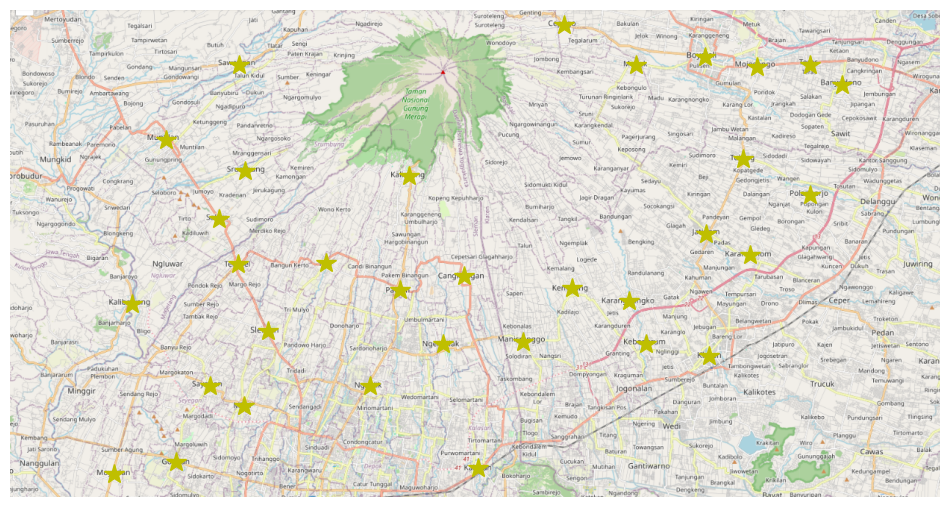

In [8]:
show_cities(cities)

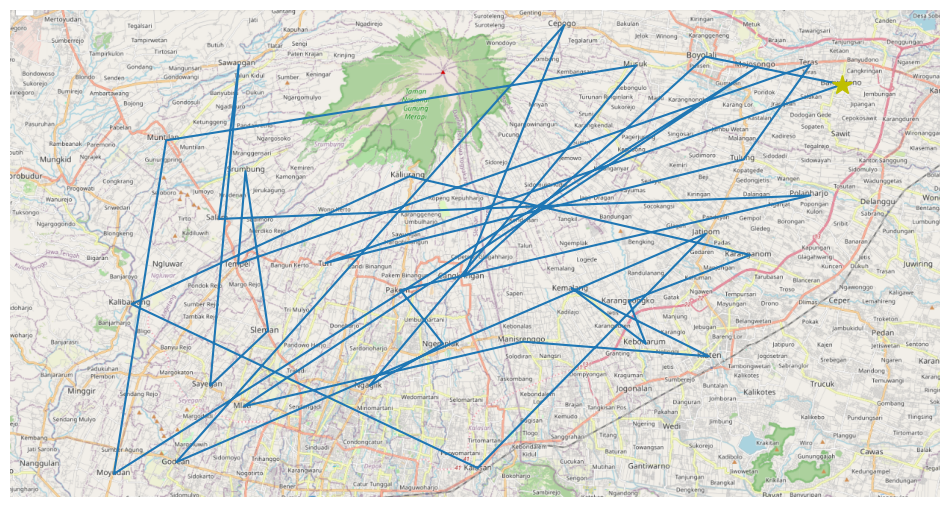

In [9]:
show_path(cities)

{'path_cost': 8661, 'ants_used': 1, 'epoch': 8250, 'round_trips': np.int32(1), 'clock': 0}
{'path_cost': 7858, 'ants_used': 56, 'epoch': 18284, 'round_trips': np.int32(2), 'clock': 0}
{'path_cost': 7190, 'ants_used': 101, 'epoch': 25398, 'round_trips': np.int32(3), 'clock': 0}
{'path_cost': 7141, 'ants_used': 103, 'epoch': 25763, 'round_trips': np.int32(3), 'clock': 0}
{'path_cost': 6963, 'ants_used': 150, 'epoch': 31805, 'round_trips': np.int32(4), 'clock': 0}
{'path_cost': 6610, 'ants_used': 152, 'epoch': 32221, 'round_trips': np.int32(4), 'clock': 0}
{'path_cost': 6504, 'ants_used': 159, 'epoch': 33581, 'round_trips': np.int32(4), 'clock': 0}
{'path_cost': 6455, 'ants_used': 184, 'epoch': 35832, 'round_trips': np.int32(4), 'clock': 0}
{'path_cost': 5826, 'ants_used': 205, 'epoch': 38996, 'round_trips': np.int32(5), 'clock': 0}
{'path_cost': 5096, 'ants_used': 216, 'epoch': 40248, 'round_trips': np.int32(5), 'clock': 0}
{'path_cost': 4996, 'ants_used': 270, 'epoch': 46576, 'round_tri

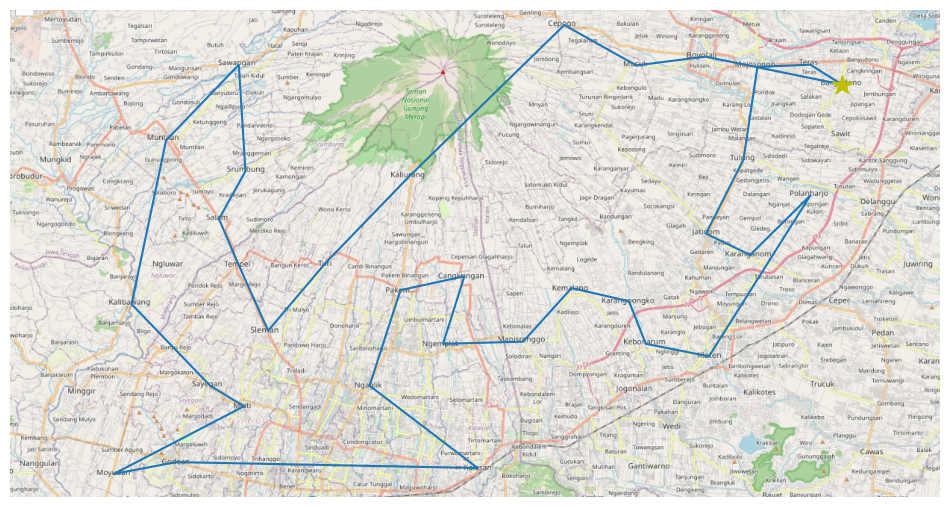

In [10]:
results = AntColonyRunner(
    cities,
    distance_power=1,
    verbose=True,
    plot=True,
    ant_count=50,
    ant_speed=1,
    min_round_trips=50,
)

{'path_cost': 9889, 'ants_used': 1, 'epoch': 8968, 'round_trips': np.int32(1), 'clock': 0}
{'path_cost': 9356, 'ants_used': 34, 'epoch': 17219, 'round_trips': np.int32(2), 'clock': 0}
{'path_cost': 9209, 'ants_used': 36, 'epoch': 19404, 'round_trips': np.int32(2), 'clock': 0}
{'path_cost': 8941, 'ants_used': 37, 'epoch': 19444, 'round_trips': np.int32(2), 'clock': 0}
{'path_cost': 8162, 'ants_used': 42, 'epoch': 19876, 'round_trips': np.int32(2), 'clock': 0}
{'path_cost': 5551, 'ants_used': 67, 'epoch': 24811, 'round_trips': np.int32(3), 'clock': 0}
{'path_cost': 5444, 'ants_used': 320, 'epoch': 78445, 'round_trips': np.int32(10), 'clock': 1}
{'path_cost': 5237, 'ants_used': 375, 'epoch': 88705, 'round_trips': np.int32(12), 'clock': 1}
{'path_cost': 5183, 'ants_used': 386, 'epoch': 90844, 'round_trips': np.int32(12), 'clock': 1}
{'path_cost': 4890, 'ants_used': 447, 'epoch': 101117, 'round_trips': np.int32(14), 'clock': 1}
{'path_cost': 4836, 'ants_used': 482, 'epoch': 106693, 'round_t

{'path_cost': 4406, 'ants_used': 5348, 'epoch': 787623, 'round_trips': np.int32(163), 'clock': 17}
{'path_cost': 4335, 'ants_used': 5511, 'epoch': 810540, 'round_trips': np.int32(167), 'clock': 17}
N=33  | 14213 -> 4349 |   84s | ants: 29148 | trips:  887 | distance_power=1 ant_count=33 ant_speed=1 min_round_trips=50 reward_power=-0.5 stop_factor=5 min_ants=33


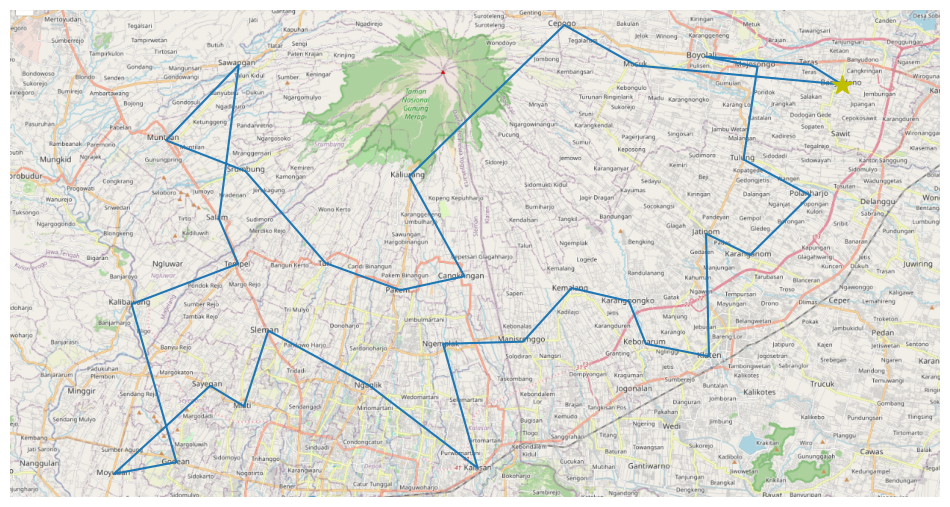

In [11]:
results_2 = AntColonyRunner(
    cities,
    distance_power=1,
    verbose=True,
    plot=True,
    ant_count=len(cities),
    ant_speed=1,
    min_round_trips=50,
    reward_power=-0.5,
    stop_factor=5,
    min_ants=len(cities),
)

In [12]:
print("\nRoute Table (results):")
print(results.get_route_table())


Route Table (results):
+----------+--------------+---------------------------------+
|   Number | City Name    |   Distance (from previous city) |
+==========+==============+=================================+
|        1 | Banyudono    |                          189.84 |
+----------+--------------+---------------------------------+
|        2 | Boyolali     |                           94.76 |
+----------+--------------+---------------------------------+
|        3 | Musuk        |                          112.38 |
+----------+--------------+---------------------------------+
|        4 | Cepogo       |                          294.88 |
+----------+--------------+---------------------------------+
|        5 | Kaliurang    |                          164.07 |
+----------+--------------+---------------------------------+
|        6 | Turi         |                          120.62 |
+----------+--------------+---------------------------------+
|        7 | Sleman       |                   

In [13]:
print("\nRoute Table (results_2):")
print(results_2.get_route_table())


Route Table (results_2):
+----------+--------------+---------------------------------+
|   Number | City Name    |   Distance (from previous city) |
+==========+==============+=================================+
|        1 | Banyudono    |                           50.77 |
+----------+--------------+---------------------------------+
|        2 | Teras        |                          143.42 |
+----------+--------------+---------------------------------+
|        3 | Boyolali     |                           72.37 |
+----------+--------------+---------------------------------+
|        4 | Mojosongo    |                          127.42 |
+----------+--------------+---------------------------------+
|        5 | Tulung       |                          103.35 |
+----------+--------------+---------------------------------+
|        6 | Polanharjo   |                          115.26 |
+----------+--------------+---------------------------------+
|        7 | Karanganom   |                 